In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets.widgets as widgets

%matplotlib inline

In [2]:
image = cv2.imread('image.jpeg')
image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Image Histogram

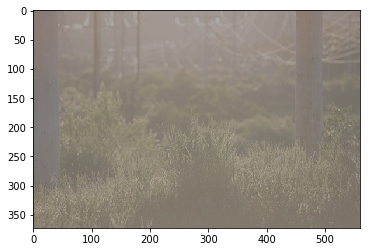

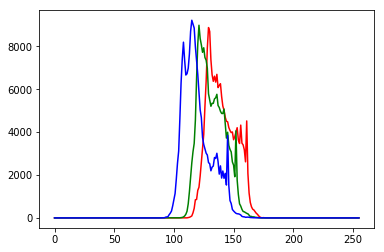

In [3]:
plt.imshow(image_color)
plt.show()

plt.plot(cv2.calcHist([image_color], [0], None, [256], [0,256]), 'r')
plt.plot(cv2.calcHist([image_color], [1], None, [256], [0,256]), 'g')
plt.plot(cv2.calcHist([image_color], [2], None, [256], [0,256]), 'b')
plt.show()

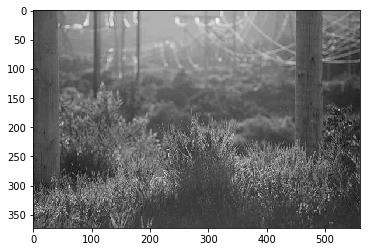

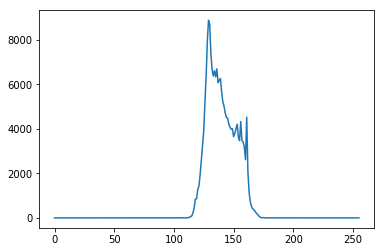

In [4]:
plt.imshow(image_grayscale, cmap='gray')
plt.show()

plt.plot(cv2.calcHist([image_color], [0], None, [256], [0,256]))
plt.show()

# Liniear Streching

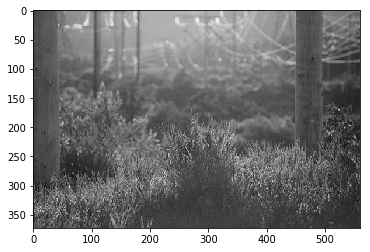

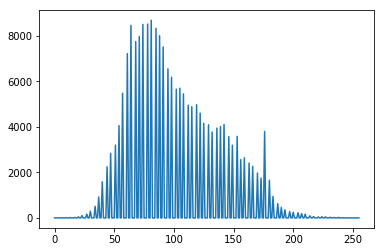

In [5]:
in_min = image_grayscale.min()
in_max = image_grayscale.max()
out_min = 0
out_max = 255

def g_function(x):
    res = (out_max - out_min) / (in_max - in_min) * (x - in_min) + out_min
    res = np.floor(max(0, min(255, res)))
    return res

stretched_image = np.vectorize(g_function)(image_grayscale).astype(np.uint8)

plt.imshow(stretched_image, cmap='gray')
plt.show()

plt.plot(cv2.calcHist([stretched_image], [0], None, [256], [0,256]))
plt.show()

# Histogram Equalization

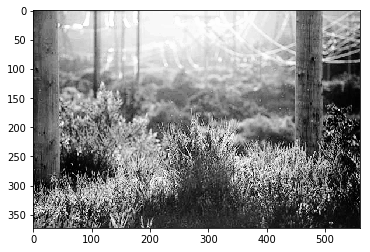

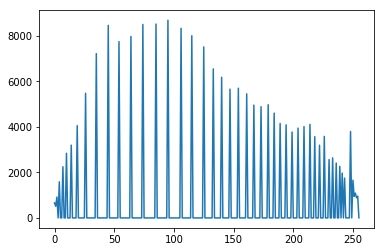

In [6]:
cummulative_sum = 0
cummulative_arr = np.zeros(256)
histogram_grayscale = cv2.calcHist([image_grayscale], [0], None, [256], [0,256]).astype(int)
for v, freq in enumerate(histogram_grayscale):
    cummulative_sum += freq
    cummulative_arr[v] = cummulative_sum

def g_function(x):
    res = cummulative_arr[x] / cummulative_sum * 255
    res = np.floor(max(0, min(255, res)))
    return res

image_equalized = np.vectorize(g_function)(image_grayscale).astype(np.uint8)

plt.imshow(image_equalized, cmap='gray')
plt.show()

plt.plot(cv2.calcHist([image_equalized], [0], None, [256], [0,256]))
plt.show()

# Histogram Specification

In [7]:
equalizer_y = np.array([20, 10, 80, 50])
equalizer_n = len(equalizer_y)
equalizer_x = np.array([np.floor(i * 256 / (equalizer_n - 1)) for i in range(equalizer_n - 1)] + [255]).astype(np.uint8)

def f(x):
    for i in reversed(range(equalizer_n - 1)):
        if x >= equalizer_x[i]:
            return equalizer_y[i] + (equalizer_y[i + 1] - equalizer_y[i]) * (x - equalizer_x[i]) / (equalizer_x[i+1] - equalizer_x[i])
    return equalizer_y[equalizer_n - 1]
dest_histogram = np.vectorize(f)(range(256))

def equalize_histogram(histogram):
    cummulative_sum = 0
    cummulative_arr = np.zeros(len(histogram))
    for v, freq in enumerate(histogram):
        cummulative_sum += freq
        cummulative_arr[v] = cummulative_sum
    return cummulative_arr

raw_hist_equalized = equalize_histogram(cv2.calcHist([image_grayscale], [0], None, [256], [0,256]).flat)

des_hist_equalized = equalize_histogram(dest_histogram)
scale_factor = raw_hist_equalized[-1] / des_hist_equalized[-1]
des_hist_equalized *= scale_factor

lookup_table = np.zeros(256)
for i in range(256):
    h_i = raw_hist_equalized[i]
    j = np.argmin(np.vectorize(lambda x: abs(h_i - x))(des_hist_equalized))
    lookup_table[i] = j
    
image_matched = np.vectorize(lambda x: lookup_table[x])(image_grayscale).astype(np.uint8)

Raw Image


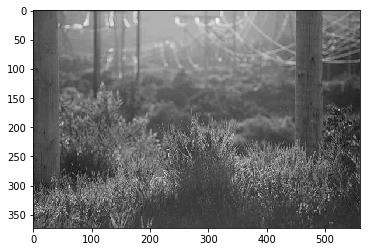

Image Histogram


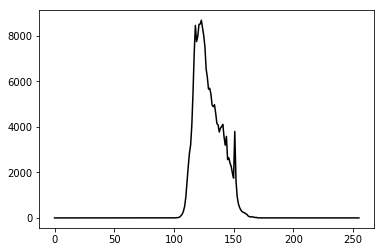

Desired Histogram


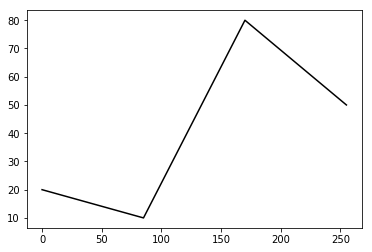

Equalized Raw Histogram


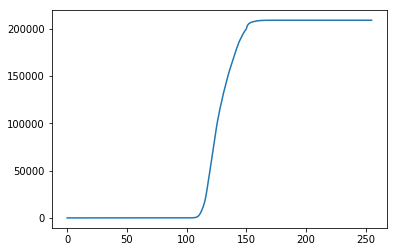

Equalized Desired Histogram


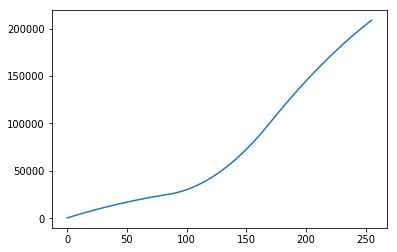

Image Result


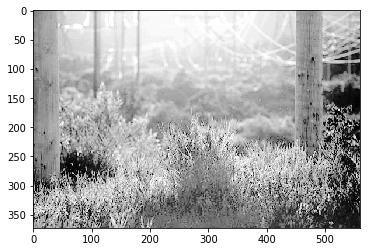

Image Histogram Image


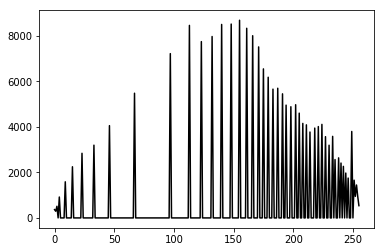

In [8]:
print('Raw Image')
plt.imshow(image_grayscale, cmap='gray')
plt.show()
    
print('Image Histogram')
plt.plot(cv2.calcHist([image_grayscale], [0], None, [256], [0,256]), 'k-')
plt.show()

print('Desired Histogram')
plt.plot(range(256), dest_histogram, 'k-')
plt.show()
    
print('Equalized Raw Histogram')
plt.plot(range(256), raw_hist_equalized)
plt.show()

print('Equalized Desired Histogram')
plt.plot(range(256), des_hist_equalized)
plt.show()

print('Image Result')
plt.imshow(image_matched, cmap='gray')
plt.show()

print('Image Histogram Image')
plt.plot(cv2.calcHist([image_matched], [0], None, [256], [0,256]), 'k-')
plt.show()